In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import uproot

import sys
sys.path.append('../')
from CAFdata import *
import helpers
from datetime import date

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
day = date.today().strftime("%Y_%m_%d")
DATA_DIR = f'/sbnd/data/users/brindenc/analyze_sbnd/nue/states/2022A/2023_1_24'
FNAME = 'cut_events.root'

In [43]:
events_tree = uproot.open(f'{DATA_DIR}/{FNAME}')
events_tree['rectree;1'].keys()

['run',
 'subrun',
 'evt',
 'nshw',
 'ntrk',
 'truenshw',
 'truentrk',
 'nstub',
 'nslc',
 'nele',
 'razzle.electrons',
 'razzle.photons',
 'Etheta',
 'evt_type',
 'vtx.x',
 'vtx.y',
 'vtx.z',
 'true_spill_eng',
 'reco_eng',
 'reco_theta',
 'true_theta',
 'lshw.eng',
 'lshw.dedx',
 'lshw.cnvgap',
 'lshw.dens',
 'lshw.len',
 'lshw.openangle',
 'slshw.eng',
 'slshw.dedx',
 'slshw.cnvgap',
 'slshw.dens',
 'slshw.len',
 'slshw.openangle',
 'genie_inttype',
 'genie_mode']

In [44]:
events_tree = uproot.open(f'{DATA_DIR}/{FNAME}:rectree;1')
events = helpers.get_df(events_tree,events_tree.keys(),hdrkeys=['run','subrun','evt'])
#events = events_tree.arrays(library='pd')
#events[1]

In [45]:
#events.set_index(['run','subrun','evt'])

In [46]:
def set_event_type(events):
  events.loc[events.loc[:,'evt_type'] == 0,'evt_type'] = 'NuEScat'
  events.loc[events.loc[:,'evt_type'] == 1,'evt_type'] = 'NCPi0'
  events.loc[events.loc[:,'evt_type'] == 2,'evt_type'] = 'NC'
  events.loc[events.loc[:,'evt_type'] == 3,'evt_type'] ='CCNuMu'
  events.loc[events.loc[:,'evt_type'] == 4,'evt_type'] = 'CCNuE'
  events.loc[events.loc[:,'evt_type'] == 5,'evt_type'] = 'Dirt'
  events.loc[events.loc[:,'evt_type'] == 6,'evt_type'] ='Other'
  return events

In [47]:
#events.loc[:,'evt_type'] = 0 #temp dumby value
#events = events[0].set_index(['run','subrun','evt'])
events = set_event_type(events)
#events.loc[:,'evt_type']

In [48]:
import seaborn as sns

lshw_keys = [key for key in events.keys() if key[:5] == 'lshw.']
lshw_keys.extend(['evt_type'])
slshw_keys = [key for key in events.keys() if key[:6] == 'slshw.']
slshw_keys.extend(['evt_type'])

lshw = events.loc[:,lshw_keys]
slshw = events.loc[:,slshw_keys]

In [62]:
lshw = lshw[(lshw != -999).all(1)] #Remove all -999 dummy values
lshw = lshw[(lshw != -5).all(1)] #Remove all -5 dummy values
lshw = lshw.loc[lshw.loc[:,'lshw.dedx']<100] #Remove all huge dedx values

slshw = slshw[(slshw != -999).all(1)] #Remove all -999 dummy values
slshw = slshw[(slshw != -5).all(1)] #Remove all -5 dummy values
slshw = slshw.loc[slshw.loc[:,'slshw.dedx']<100] #Remove all huge dedx values

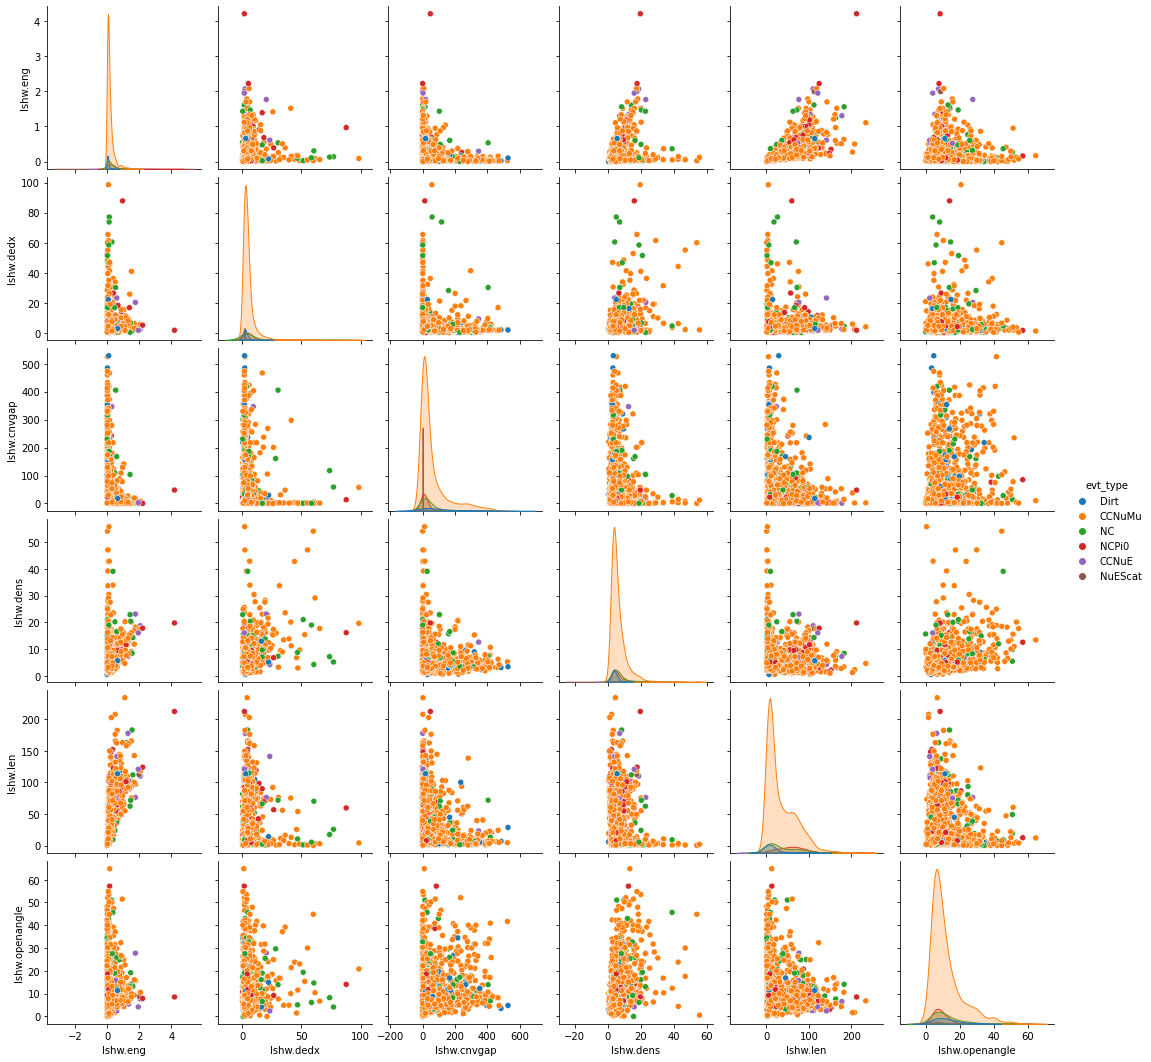

In [63]:
sns.pairplot(lshw,hue='evt_type')

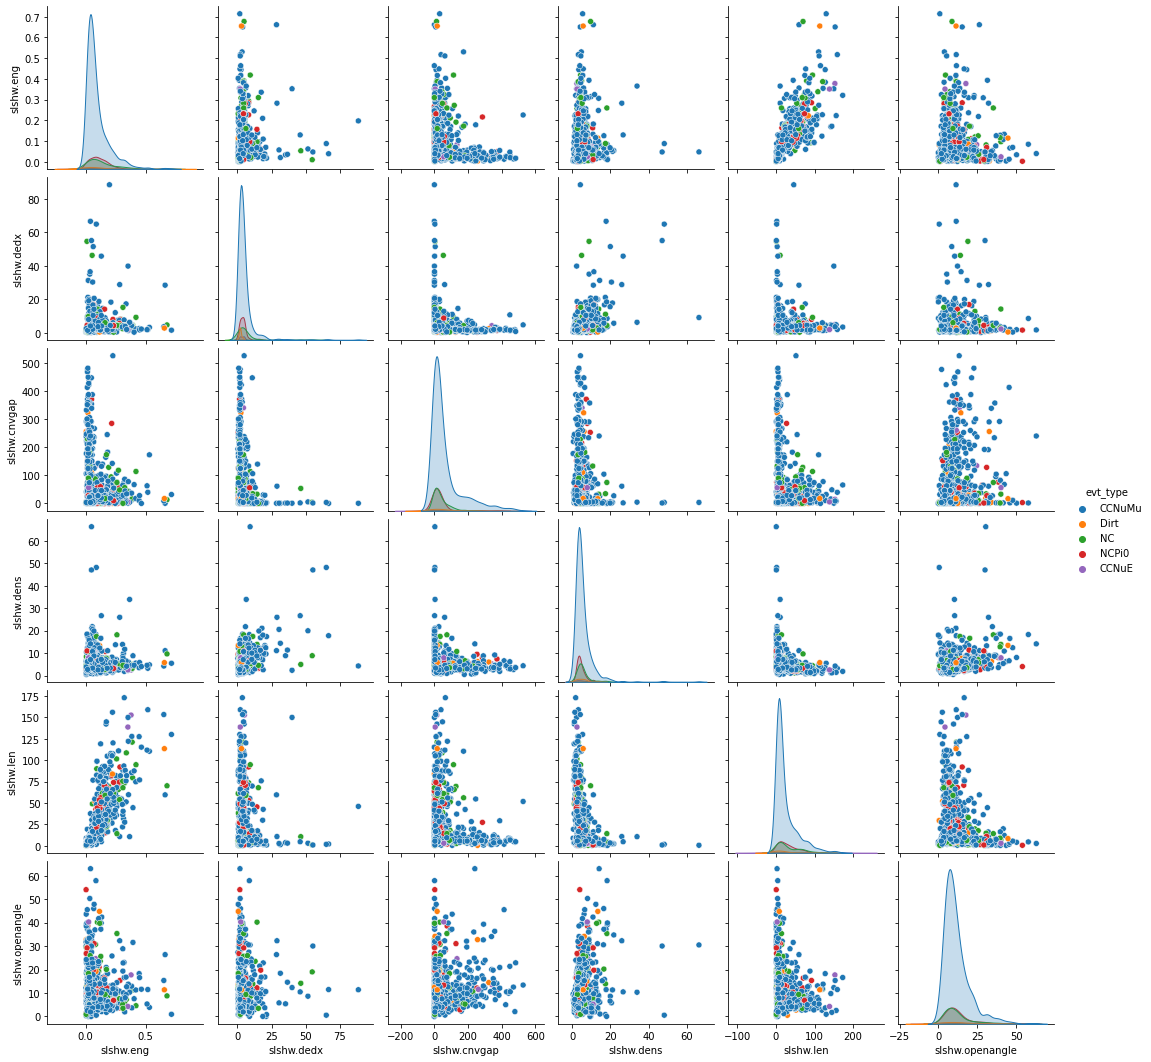

In [64]:
sns.pairplot(slshw,hue='evt_type')

In [27]:
938.15 +31.55 +27.73 +16.00 +8.22 +17.51

1039.16

In [27]:
import random

def get_random_univ(M,sys):
  """
  \description: get random universe for bin counts N by randomly
  varying within systematic and statistical uncertainties
  \param: M - Montecarlo events
  """
  N = M.copy() #Copy M, make it "data-like"
  for i,bin_content in enumerate(N):
    bin_content = bin_content + random.choice([1, -1])*np.random.normal(N[i],sys[i])
    #bin_content = bin_content + random.choice([1, -1])*np.random.normal(N[i],1/np.sqrt(N[i])) #stat
    N[i] = bin_content
  return N

In [1]:
M = np.array([48.7,14.4,20.5,18.1,11.9,21.6])
sys = np.array([9.9,5.2,6.3,5.9,4.3,7.7])
stat = 1/np.sqrt(M)
stat,sys/M

NameError: name 'np' is not defined

In [29]:
n = get_random_univ(M,sys)
n,M

(array([99.66613784, 29.76563564,  3.84779541, -0.27023862, -6.36743604,
        28.32301494]),
 array([48.7, 14.4, 20.5, 18.1, 11.9, 21.6]))